<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Machine-Learning_sklearn/Titanic_Dataset_Logistic_Regression_all_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model predict if a person that was in Titanic survived or not, according to age, sex, class, payed fare and precence of family on board.

0= not survived; 1=survived

prediction (10 first points):
[0 1 1 1 0 0 0 0 1 1]
target:
[0 1 1 1 0 0 0 0 1 1]

 accuracy: 0.79851
precision: 0.76923
   recall: 0.72727
 f1 score: 0.74766


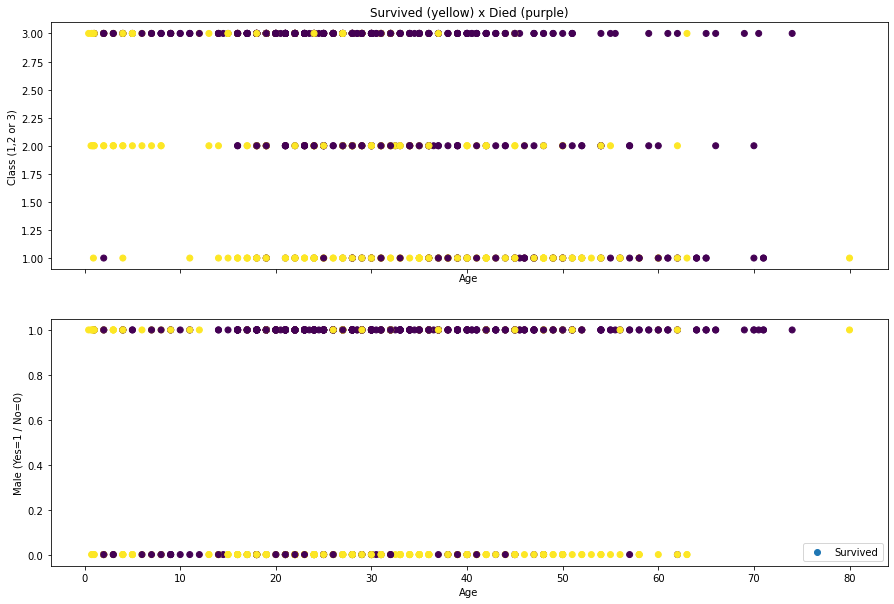


Graph insight: Children, women and people that are in the 1th class are more likely to survive



In [24]:
print('This model predict if a person that was in Titanic survived or not, according to age, sex, class, payed fare and precence of family on board.')
print()

#----Import libriries------
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#-----Model development-----
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv') #import data
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test =train_test_split(X, y,train_size=0.85,random_state=2) #Split data in train and test

model = LogisticRegression() #create model

model.fit(X_train, y_train) #training step

y_pred = model.predict(X_test) #prediction step
#y_pred = model.predict_proba(X_test)[:, 1] > 0.4 #activate if want to change the treshold of LR model

#------Evaluating step-------

print('0= not survived; 1=survived')
print()
print('prediction (10 first points):')
print(model.predict(X[:10])) #print 10 values predicted for comparison
print('target:')
print(y[:10]) #print targets for comparison

#print('Model Coeficients=',model.coef_, model.intercept_)

print()
print(" accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

#-------Vizualization-----------

plt.rcParams['figure.figsize'] = [15, 10] # changing graphic area
f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(df['Age'], df['Pclass'], c=df['Survived'])
axarr[0].set_title('Survived (yellow) x Died (purple)')
axarr[0].set_xlabel('Age')
axarr[0].set_ylabel('Class (1,2 or 3)')
axarr[1].scatter(df['Age'], df['male'], c=df['Survived'])
axarr[1].set_xlabel('Age')
axarr[1].set_ylabel('Male (Yes=1 / No=0)')
axarr[1].legend(['Survived','Not Survived'])
plt.show()
print()
print('Graph insight: Children, women and people that are in the 1th class are more likely to survive')
print()